In [12]:
import pandas as pd
import regex as re
import string 
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

C:\Users\jackc\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# preprocessing functions
# preprocessing
stop_words = stopwords.words('english')
stop_words += stopwords.words('spanish')

stop_words += list(string.punctuation)
stop_words += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '’', 'amp', "'", '``', "''", '“' , '”', '...', "'s", "n't", 'covid19', 'coronavirus', 'covid_19', 'pandemic']

def remove_urls(dataframe):
#replace URL of a text
    dataframe['text'] = dataframe['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', regex=True)

# tokenize
# remove stop words, puncutation, lower()
def tokenize_lowercase(text):
    tokens = nltk.word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed


C:\Users\jackc\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:11: DeprecationWarning: invalid escape sequence \(
<>:11: DeprecationWarning: invalid escape sequence \(
<ipython-input-13-451d73ba615d>:11: DeprecationWarning: invalid escape sequence \(
  dataframe['text'] = dataframe['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', regex=True)


In [14]:
# df = pd.read_csv('dataset-with-toxicity.csv') 
df = pd.read_csv('with_country_codes.csv') 
# df = df[df['country_code'] == 'US'] 
df = df[df['country_code'] == 'GB'] 
# df = df[df['country_code'] == 'IN']

remove_urls(df)
df['text'] = df['text'].apply(tokenize_lowercase)

C:\Users\jackc\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
from nltk.probability import FreqDist

#iterate through each tweet, then each token in each tweet, and store in one list
flat_words = [item for sublist in df['text'] for item in sublist]
word_freq = FreqDist(flat_words)
word_freq.most_common(30)

C:\Users\jackc\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('nhs', 128),
 ('please', 116),
 ('us', 97),
 ('people', 95),
 ('support', 82),
 ('care', 81),
 ('uk', 77),
 ('staff', 76),
 ('help', 75),
 ('workers', 74),
 ('crisis', 74),
 ('home', 73),
 ('today', 72),
 ('time', 70),
 ('need', 69),
 ('new', 65),
 ('one', 64),
 ('work', 63),
 ('government', 62),
 ('stayhomesavelives', 59),
 ('thank', 56),
 ('get', 55),
 ('safe', 54),
 ('lockdown', 53),
 ('hospital', 52),
 ('health', 50),
 ('ppe', 50),
 ('day', 49),
 ('many', 47),
 ('stay', 47)]

In [16]:
#retrieve word and count from FreqDist tuples
most_common_count = [x[1] for x in word_freq.most_common(30)]
most_common_word = [x[0] for x in word_freq.most_common(30)]

#create dictionary mapping of word count
top_30_dictionary = dict(zip(most_common_word, most_common_count))

C:\Users\jackc\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\jackc\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


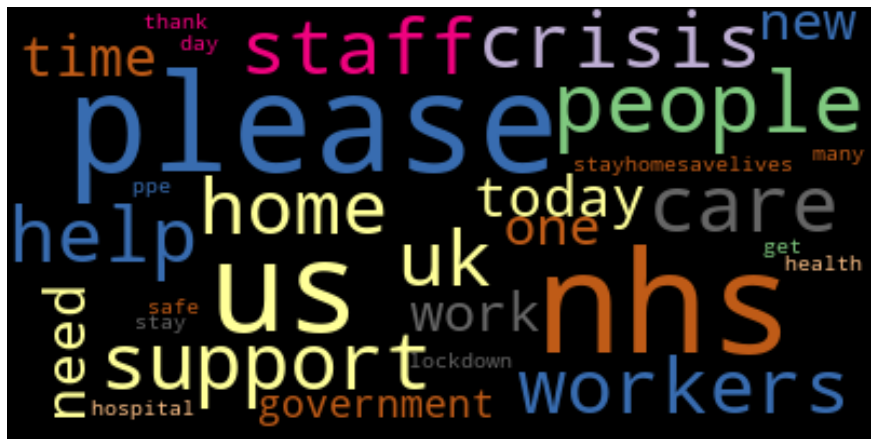

In [17]:
from wordcloud import WordCloud

#Create Word Cloud of top 30 words
wordcloud = WordCloud(colormap = 'Accent', background_color = 'black').generate_from_frequencies(top_30_dictionary)

#plot with matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('top_30_cloud.png')
plt.show()

In [18]:
from gensim.corpora import Dictionary

text_dict = Dictionary(df.text)

C:\Users\jackc\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
tweets_bow = [text_dict.doc2bow(tweet) for tweet in df['text']]

C:\Users\jackc\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
from gensim.models.ldamodel import LdaModel

k = 5
tweets_lda = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 1,
                      passes=10)

tweets_lda.show_topics()

C:\Users\jackc\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.005*"workers" + 0.004*"lockdown" + 0.004*"care" + 0.004*"people" + 0.003*"work" + 0.003*"government" + 0.003*"stayhomesavelives" + 0.003*"health" + 0.003*"crisis" + 0.003*"time"'),
 (1,
  '0.005*"help" + 0.005*"please" + 0.005*"nhs" + 0.004*"day" + 0.004*"one" + 0.004*"staff" + 0.003*"time" + 0.003*"many" + 0.003*"uk" + 0.003*"today"'),
 (2,
  '0.006*"please" + 0.006*"nhs" + 0.005*"support" + 0.004*"hospital" + 0.004*"us" + 0.004*"staff" + 0.003*"new" + 0.003*"thank" + 0.003*"care" + 0.003*"working"'),
 (3,
  '0.005*"us" + 0.004*"uk" + 0.004*"government" + 0.003*"today" + 0.003*"nhs" + 0.003*"crisis" + 0.003*"lockdown" + 0.003*"safe" + 0.003*"get" + 0.003*"stayhomesavelives"'),
 (4,
  '0.006*"nhs" + 0.006*"need" + 0.005*"people" + 0.005*"please" + 0.004*"home" + 0.004*"care" + 0.004*"us" + 0.003*"help" + 0.003*"new" + 0.003*"support"')]

In [21]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(tweets_lda, tweets_bow, dictionary=tweets_lda.id2word)
vis

C:\Users\jackc\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.019592  0.064157       1        1  21.385774
1      0.023091 -0.011706       2        1  20.773595
2      0.064259  0.039308       3        1  19.841948
0      0.012699 -0.109496       4        1  19.054911
3     -0.119641  0.017737       5        1  18.943772, topic_info=         Term       Freq      Total Category  logprob  loglift
691      need  50.000000  50.000000  Default  30.0000  30.0000
167       day  36.000000  36.000000  Default  29.0000  29.0000
141  lockdown  38.000000  38.000000  Default  28.0000  28.0000
174     needs  14.000000  14.000000  Default  27.0000  27.0000
558  hospital  38.000000  38.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
321      keep   7.516905  28.062312   Topic5  -6.2859   0.3464
330     staff   8.047054  55.815752   Topic5  -6.2178  -0.2731
558  hospital   7.538185  38.261265   Topic5  -6.2831   0.0392
76     people   7.832296  69.604707   Topic5  -6.2448  -0.5209
61     please   7.352108  84.901909   Topic5  -6.3081  -0.7828

[398 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1528      3  0.693663   1-5
2538      2  0.786052  1000
2538      4  0.196513  1000
313       2  0.309587   1st
313       4  0.619173   1st
...     ...       ...   ...
7909      3  0.693663    ❇️
3085      2  0.686148     🐈
2397      2  0.822872    😎😍
630       3  0.693666    🙏🏽
5412      2  0.686144    🤗😘

[739 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 3, 1, 4])